In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
path="data"
company_list = ['INFY.csv', 'WIPRO.csv', 'TCS.csv', 'HCLTECH.csv']

all_data=pd.DataFrame()
for i in company_list:
    df=pd.read_csv(path+"/"+i)
    all_data=pd.concat([all_data,df])
all_data.shape

(19643, 15)

In [31]:
all_data=all_data.replace({'Symbol': {'INFOSYSTCH': 'INFY'}})

In [32]:
all_data.dtypes

Date                   object
Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [33]:
all_data['Date']=pd.to_datetime(all_data['Date'])

In [34]:
all_data['Date'][0]

0   2000-01-03
0   2000-01-03
0   2004-08-25
0   2000-01-11
Name: Date, dtype: datetime64[ns]

In [35]:
all_data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [36]:
all_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,INFY,EQ,14467.75,15625.00,15625.20,15625.00,15625.20,15625.20,15625.18,5137,8.026657e+12,NaN,NaN,NaN
1,2000-01-04,INFY,EQ,15625.20,16800.00,16875.25,16253.00,16875.25,16855.90,16646.38,56186,9.352937e+13,NaN,NaN,NaN
2,2000-01-05,INFY,EQ,16855.90,15701.00,16250.00,15507.45,15507.45,15507.45,15786.38,164605,2.598516e+14,NaN,NaN,NaN
3,2000-01-06,INFY,EQ,15507.45,15256.65,15300.00,14266.85,14266.85,14266.85,14462.82,81997,1.185908e+14,NaN,NaN,NaN
4,2000-01-07,INFY,EQ,14266.85,13125.50,13125.50,13125.50,13125.50,13125.50,13125.50,7589,9.960942e+12,NaN,NaN,NaN


analyze closing prize



In [37]:
tech_list = all_data['Symbol'].unique()
tech_list

array(['INFY', 'WIPRO', 'TCS', 'HCLTECH'], dtype=object)

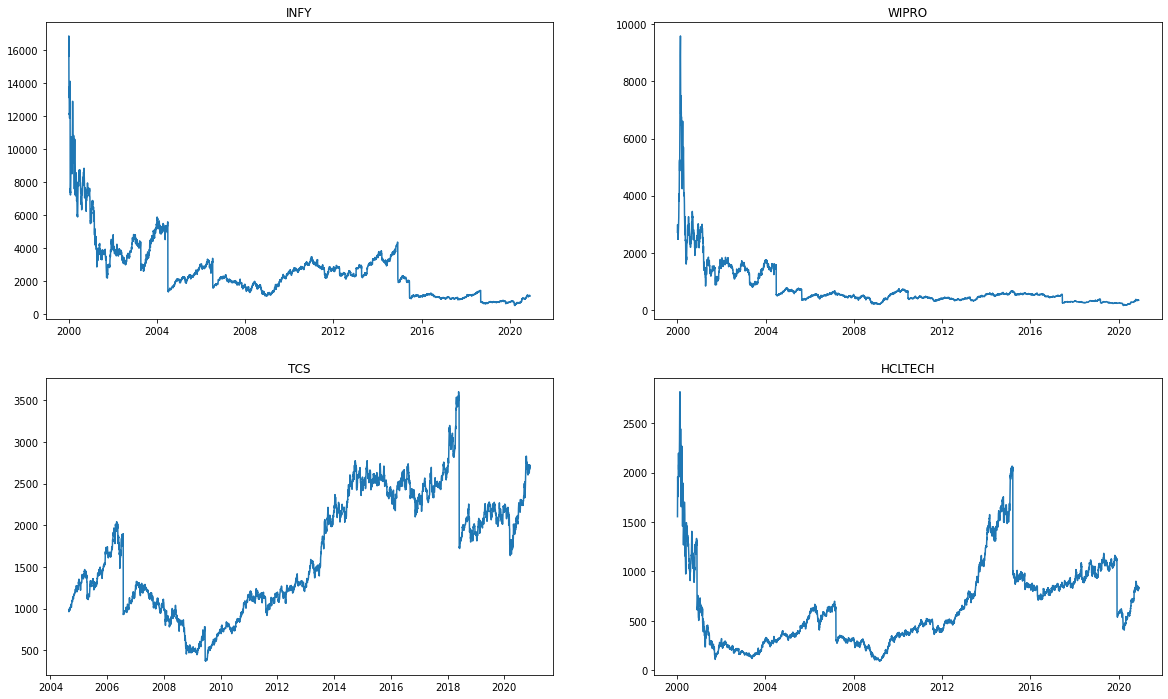

In [38]:
plt.figure(figsize=(20,12))
for i, company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Symbol']==company]
    plt.plot(df['Date'],df['Close'])
    plt.title(company)
plt.show()

let's analyse the total volume of stock being traded each day

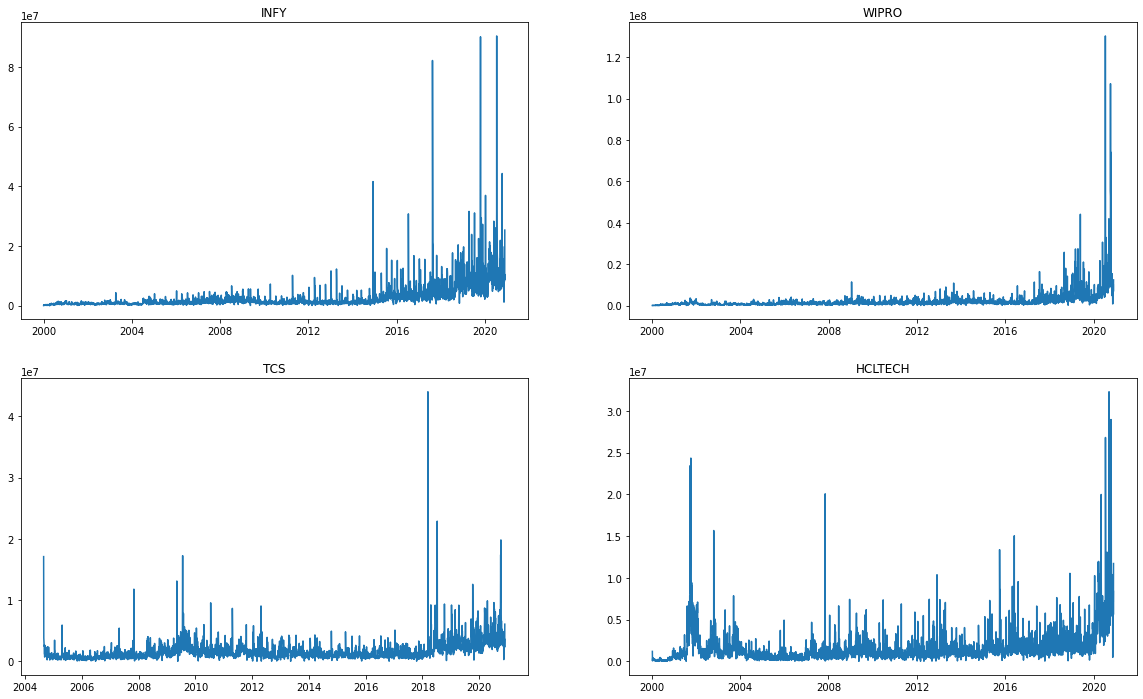

In [39]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
    plt.subplot(2, 2, i)
    df=all_data[all_data['Symbol']==company]
    plt.plot(df['Date'],df['Volume'])
    plt.title(company)
plt.show()

using plotly

In [40]:
import plotly.express as plx

In [51]:
for company in (tech_list):
    df=all_data[all_data['Symbol']==company]
    df=df[:2000]
    fig = plx.line(df, x="Date", y="Volume", title=company)
    fig.show()